In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
file_path = '../data/fire.csv'
fire_df = pd.read_csv(file_path)
fire_df

,lat,lon,burned_area,fraction_of_burnable_area,lat_bounds,lon_bounds,year,month
0,51.875,-9.875,0.0,0.805087,52.00,-10.00,2006,7
1,51.875,-9.875,0.0,0.805087,51.75,-9.75,2006,7
2,51.875,-9.625,0.0,0.936129,52.00,-9.75,2006,7
3,51.875,-9.625,0.0,0.936129,51.75,-9.50,2006,7
4,51.875,-9.375,0.0,0.998650,52.00,-9.50,2006,7
...,...,...,...,...,...,...,...,...
306891,33.125,11.375,0.0,0.078498,33.00,11.50,2013,7
306892,33.125,11.625,0.0,0.028697,33.25,11.50,2013,7
306893,33.125,11.625,0.0,0.028697,33.00,11.75,2013,7
306894,33.125,11.875,0.0,0.026878,33.25,11.75,2013,7


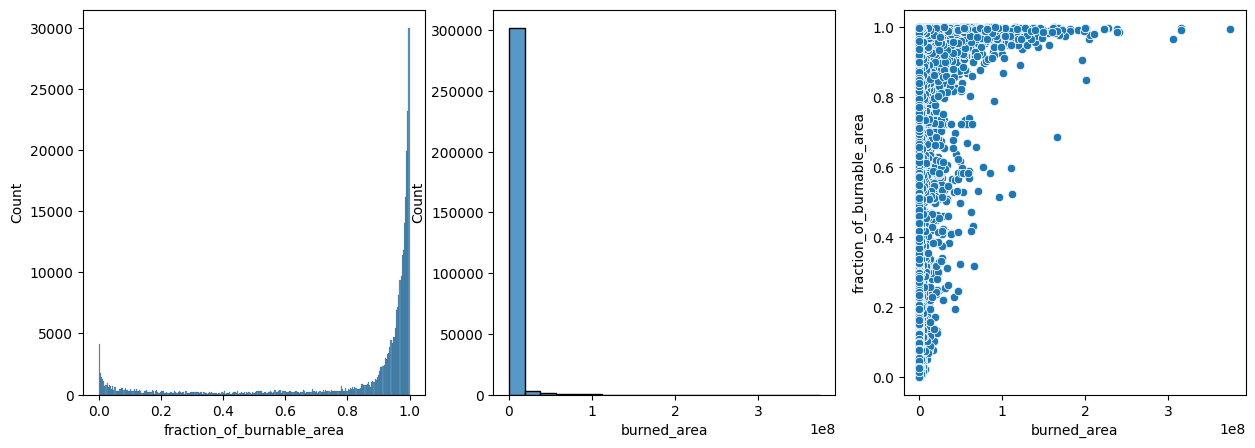

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(fire_df['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_df['burned_area'], ax=ax2)
sns.scatterplot(data=fire_df, x='burned_area', y='fraction_of_burnable_area', ax=ax3)
plt.show();

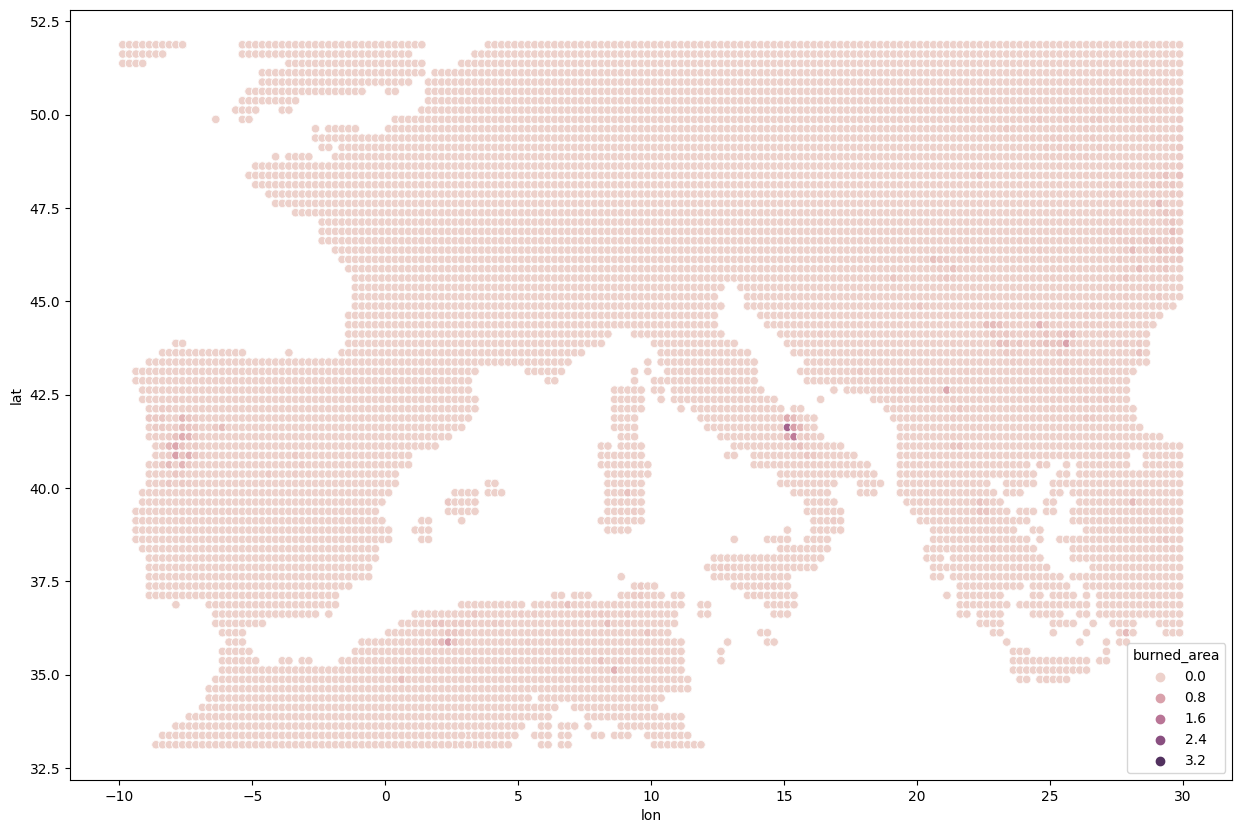

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=fire_df, x='lon', y='lat', hue = 'burned_area');

In [32]:
climate_df = pd.read_csv('../data/climate.csv')
climate_df

,Unnamed: 0,lon,lat,year,month,tas,tasmax,pr
0,0,-10.0,33.0,2001,7,NaN,NaN,NaN
1,1,-10.0,34.0,2001,7,NaN,NaN,NaN
2,2,-10.0,35.0,2001,7,NaN,NaN,NaN
3,3,-10.0,36.0,2001,7,NaN,NaN,NaN
4,4,-10.0,37.0,2001,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
15575,15575,30.0,48.0,2019,7,20.800000,26.700000,35.600
15576,15576,30.0,49.0,2019,7,19.925001,26.300001,39.450
15577,15577,30.0,50.0,2019,7,19.800000,25.500000,54.950
15578,15578,30.0,51.0,2019,7,19.225000,24.600000,71.050


In [49]:
fire_cliamte = fire_df.merge(
    climate_df,
    how='left',
    left_on=['lat_bounds', 'lon_bounds', 'year', 'month'],
    right_on=['lat', 'lon', 'year', 'month']
    )

fire_cliamte

,lat_x,lon_x,burned_area,fraction_of_burnable_area,lat_bounds,lon_bounds,year,month,Unnamed: 0,lon_y,lat_y,tas,tasmax,pr
0,51.875,-9.875,0.0,0.805087,52.00,-10.00,2006,7,4119.0,-10.0,52.0,16.725000,21.100000,60.875
1,51.875,-9.875,0.0,0.805087,51.75,-9.75,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
2,51.875,-9.625,0.0,0.936129,52.00,-9.75,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
3,51.875,-9.625,0.0,0.936129,51.75,-9.50,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
4,51.875,-9.375,0.0,0.998650,52.00,-9.50,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306891,33.125,11.375,0.0,0.078498,33.00,11.50,2013,7,NaN,NaN,NaN,NaN,NaN,NaN
306892,33.125,11.625,0.0,0.028697,33.25,11.50,2013,7,NaN,NaN,NaN,NaN,NaN,NaN
306893,33.125,11.625,0.0,0.028697,33.00,11.75,2013,7,NaN,NaN,NaN,NaN,NaN,NaN
306894,33.125,11.875,0.0,0.026878,33.25,11.75,2013,7,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
fire_climate_filtered = fire_cliamte.drop(['Unnamed: 0', 'lon_y', 'lat_y'], axis=1).dropna()
fire_climate_filtered

,lat_x,lon_x,burned_area,fraction_of_burnable_area,lat_bounds,lon_bounds,year,month,tas,tasmax,pr
0,51.875,-9.875,0.0,0.805087,52.0,-10.0,2006,7,16.725000,21.100000,60.875
8,51.875,-8.875,0.0,0.979073,52.0,-9.0,2006,7,16.750000,21.300001,55.950
16,51.875,-7.875,0.0,0.346638,52.0,-8.0,2006,7,17.225000,22.000000,44.125
24,51.875,-4.875,0.0,0.973805,52.0,-5.0,2006,7,17.925000,22.500000,57.050
32,51.875,-3.875,0.0,0.978972,52.0,-4.0,2006,7,17.425000,22.800001,62.750
...,...,...,...,...,...,...,...,...,...,...,...
306865,33.125,3.875,0.0,0.014338,33.0,4.0,2013,7,32.125000,40.300000,0.900
306873,33.125,5.875,0.0,0.001742,33.0,6.0,2013,7,34.000000,41.700000,0.175
306879,33.125,6.875,0.0,0.001078,33.0,7.0,2013,7,33.600002,41.700000,0.000
306887,33.125,10.875,0.0,0.015831,33.0,11.0,2013,7,29.100000,35.800000,0.000
